In [27]:
import sqlite3
from datetime import datetime
import random
import matplotlib.pyplot as plt
import pandas as pd

In [28]:
conn = sqlite3.connect('src/quanta.db')

In [29]:
conn.execute("INSERT INTO devices (description) VALUES ('Heater')")

In [30]:
heater_id = conn.execute('SELECT * FROM devices WHERE description LIKE "Heater"').fetchone()[0]

In [31]:
conn.execute("INSERT INTO metrics (name, type_name) VALUES ('Temperature', 'float')")

In [32]:
temperature_id = conn.execute('SELECT * FROM metrics WHERE name LIKE "Temperature"').fetchone()[0]

In [33]:
from datetime import timedelta

current_time = datetime(2024, 12, 8, 9, 0)
end_time = current_time.replace(hour=21, minute=0)

current_temp = 20.0

while current_time < end_time:
    current_time += timedelta(minutes=1)
    current_temp += random.uniform(-0.1, 0.1)
    conn.execute("INSERT INTO messages (device_id, metric_id, value, datetime) VALUES (?, ?, ?, ?)", (heater_id, temperature_id, current_temp, current_time.strftime('%Y-%m-%d %H:%M:%S')))

In [34]:
conn.commit()

In [35]:
df = pd.read_sql('SELECT * FROM messages WHERE device_id = ? AND metric_id = ?', conn, params=(heater_id, temperature_id), index_col="id")

<Axes: title={'center': 'Heater Temperature'}, xlabel='Time', ylabel='Temperature (°C)'>

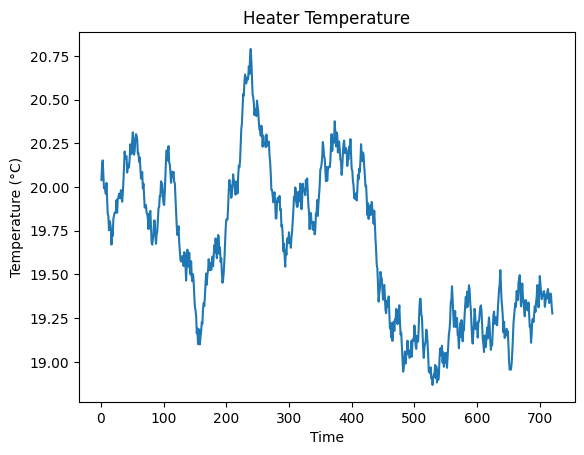

In [36]:
df["value"] = df["value"].astype(float)
df["value"].plot(
    title="Heater Temperature",
    xlabel="Time",
    ylabel="Temperature (°C)"
)